# Decision Tree Classification

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier, plot_tree

C:\Users\babul\AppData\Local\Temp\ipykernel_23312\4215907657.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('HeartDisease_data.csv')
df

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0,32.81,Yes,No,No,0.0,Yes,Female,White,Yes,Yes,Good,5.0,No,No,No
1,1,1,35.43,No,No,No,2.0,No,Female,Black,Yes,Yes,Good,6.0,Yes,No,No
2,2,0,45.35,No,No,No,0.0,Yes,Male,White,Yes,No,Good,8.0,No,No,No
3,3,0,23.86,No,No,No,0.0,No,Female,White,No,Yes,Very good,8.0,No,No,No
4,4,0,26.75,No,No,Yes,0.0,No,Female,Black,No,Yes,Good,7.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0,25.84,Yes,No,No,3.0,Yes,Male,White,No,No,Fair,5.0,Yes,No,No
496,496,0,24.69,No,No,No,3.0,No,Female,White,No,Yes,Excellent,7.0,No,No,No
497,497,1,28.46,Yes,No,Yes,0.0,No,Male,White,No,Yes,Good,6.0,No,No,No
498,498,0,22.04,No,No,No,0.0,No,Male,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.dropna(inplace = True)
df

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0,32.81,Yes,No,No,0.0,Yes,Female,White,Yes,Yes,Good,5.0,No,No,No
1,1,1,35.43,No,No,No,2.0,No,Female,Black,Yes,Yes,Good,6.0,Yes,No,No
2,2,0,45.35,No,No,No,0.0,Yes,Male,White,Yes,No,Good,8.0,No,No,No
3,3,0,23.86,No,No,No,0.0,No,Female,White,No,Yes,Very good,8.0,No,No,No
4,4,0,26.75,No,No,Yes,0.0,No,Female,Black,No,Yes,Good,7.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0,25.84,Yes,No,No,3.0,Yes,Male,White,No,No,Fair,5.0,Yes,No,No
496,496,0,24.69,No,No,No,3.0,No,Female,White,No,Yes,Excellent,7.0,No,No,No
497,497,1,28.46,Yes,No,Yes,0.0,No,Male,White,No,Yes,Good,6.0,No,No,No
498,498,0,22.04,No,No,No,0.0,No,Male,White,No,Yes,Very good,8.0,No,No,No


Checking the number of Class present in the feature of dataset

In [4]:
unique_values = df['Diabetic'].unique()

print(unique_values)

['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']


One Hot-Encoding for Diabetic feature

In [5]:
classes = df['Diabetic'].unique().tolist()

one_hot_encoded_df = pd.DataFrame()

for cls in classes:
    
    one_hot_encoded_df[cls] = (df['Diabetic'] == cls).astype(int)

print(one_hot_encoded_df)


     Yes  No  No, borderline diabetes  Yes (during pregnancy)
0      1   0                        0                       0
1      1   0                        0                       0
2      1   0                        0                       0
3      0   1                        0                       0
4      0   1                        0                       0
..   ...  ..                      ...                     ...
495    0   1                        0                       0
496    0   1                        0                       0
497    0   1                        0                       0
498    0   1                        0                       0
499    0   1                        0                       0

[500 rows x 4 columns]


In [6]:
df = pd.concat([df, one_hot_encoded_df], axis=1)
df

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,MentalHealth,DiffWalking,Sex,Race,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Yes,No,"No, borderline diabetes",Yes (during pregnancy)
0,0,0,32.81,Yes,No,No,0.0,Yes,Female,White,...,Yes,Good,5.0,No,No,No,1,0,0,0
1,1,1,35.43,No,No,No,2.0,No,Female,Black,...,Yes,Good,6.0,Yes,No,No,1,0,0,0
2,2,0,45.35,No,No,No,0.0,Yes,Male,White,...,No,Good,8.0,No,No,No,1,0,0,0
3,3,0,23.86,No,No,No,0.0,No,Female,White,...,Yes,Very good,8.0,No,No,No,0,1,0,0
4,4,0,26.75,No,No,Yes,0.0,No,Female,Black,...,Yes,Good,7.0,No,No,No,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0,25.84,Yes,No,No,3.0,Yes,Male,White,...,No,Fair,5.0,Yes,No,No,0,1,0,0
496,496,0,24.69,No,No,No,3.0,No,Female,White,...,Yes,Excellent,7.0,No,No,No,0,1,0,0
497,497,1,28.46,Yes,No,Yes,0.0,No,Male,White,...,Yes,Good,6.0,No,No,No,0,1,0,0
498,498,0,22.04,No,No,No,0.0,No,Male,White,...,Yes,Very good,8.0,No,No,No,0,1,0,0


In [7]:
df.rename(columns={'Yes': 'Yes(Diabetic)', 'No':'No (Diabetic)'}, inplace= True)
df.drop(columns = 'Diabetic', inplace = True)
df

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,MentalHealth,DiffWalking,Sex,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Yes(Diabetic),No (Diabetic),"No, borderline diabetes",Yes (during pregnancy)
0,0,0,32.81,Yes,No,No,0.0,Yes,Female,White,Yes,Good,5.0,No,No,No,1,0,0,0
1,1,1,35.43,No,No,No,2.0,No,Female,Black,Yes,Good,6.0,Yes,No,No,1,0,0,0
2,2,0,45.35,No,No,No,0.0,Yes,Male,White,No,Good,8.0,No,No,No,1,0,0,0
3,3,0,23.86,No,No,No,0.0,No,Female,White,Yes,Very good,8.0,No,No,No,0,1,0,0
4,4,0,26.75,No,No,Yes,0.0,No,Female,Black,Yes,Good,7.0,No,No,No,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0,25.84,Yes,No,No,3.0,Yes,Male,White,No,Fair,5.0,Yes,No,No,0,1,0,0
496,496,0,24.69,No,No,No,3.0,No,Female,White,Yes,Excellent,7.0,No,No,No,0,1,0,0
497,497,1,28.46,Yes,No,Yes,0.0,No,Male,White,Yes,Good,6.0,No,No,No,0,1,0,0
498,498,0,22.04,No,No,No,0.0,No,Male,White,Yes,Very good,8.0,No,No,No,0,1,0,0


In [8]:
unique_values = df['Race'].unique()
print(unique_values)

['White' 'Black' 'Other' 'American Indian/Alaskan Native' 'Hispanic'
 'Asian']


In [9]:
classes = df['Race'].unique().tolist()
one_hot_encoded_df = pd.DataFrame()

for cls in classes:
    one_hot_encoded_df[cls] = (df['Race'] == cls).astype(int)

print(one_hot_encoded_df)

     White  Black  Other  American Indian/Alaskan Native  Hispanic  Asian
0        1      0      0                               0         0      0
1        0      1      0                               0         0      0
2        1      0      0                               0         0      0
3        1      0      0                               0         0      0
4        0      1      0                               0         0      0
..     ...    ...    ...                             ...       ...    ...
495      1      0      0                               0         0      0
496      1      0      0                               0         0      0
497      1      0      0                               0         0      0
498      1      0      0                               0         0      0
499      1      0      0                               0         0      0

[500 rows x 6 columns]


In [10]:
df = pd.concat([df, one_hot_encoded_df], axis= 1)
df

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,MentalHealth,DiffWalking,Sex,Race,...,Yes(Diabetic),No (Diabetic),"No, borderline diabetes",Yes (during pregnancy),White,Black,Other,American Indian/Alaskan Native,Hispanic,Asian
0,0,0,32.81,Yes,No,No,0.0,Yes,Female,White,...,1,0,0,0,1,0,0,0,0,0
1,1,1,35.43,No,No,No,2.0,No,Female,Black,...,1,0,0,0,0,1,0,0,0,0
2,2,0,45.35,No,No,No,0.0,Yes,Male,White,...,1,0,0,0,1,0,0,0,0,0
3,3,0,23.86,No,No,No,0.0,No,Female,White,...,0,1,0,0,1,0,0,0,0,0
4,4,0,26.75,No,No,Yes,0.0,No,Female,Black,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0,25.84,Yes,No,No,3.0,Yes,Male,White,...,0,1,0,0,1,0,0,0,0,0
496,496,0,24.69,No,No,No,3.0,No,Female,White,...,0,1,0,0,1,0,0,0,0,0
497,497,1,28.46,Yes,No,Yes,0.0,No,Male,White,...,0,1,0,0,1,0,0,0,0,0
498,498,0,22.04,No,No,No,0.0,No,Male,White,...,0,1,0,0,1,0,0,0,0,0


In [11]:
df.rename(columns= {'Other': 'Other(Race)'}, inplace = True)
df
df.drop(columns= 'Race', inplace = True)
df

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Yes(Diabetic),No (Diabetic),"No, borderline diabetes",Yes (during pregnancy),White,Black,Other(Race),American Indian/Alaskan Native,Hispanic,Asian
0,0,0,32.81,Yes,No,No,0.0,Yes,Female,Yes,...,1,0,0,0,1,0,0,0,0,0
1,1,1,35.43,No,No,No,2.0,No,Female,Yes,...,1,0,0,0,0,1,0,0,0,0
2,2,0,45.35,No,No,No,0.0,Yes,Male,No,...,1,0,0,0,1,0,0,0,0,0
3,3,0,23.86,No,No,No,0.0,No,Female,Yes,...,0,1,0,0,1,0,0,0,0,0
4,4,0,26.75,No,No,Yes,0.0,No,Female,Yes,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0,25.84,Yes,No,No,3.0,Yes,Male,No,...,0,1,0,0,1,0,0,0,0,0
496,496,0,24.69,No,No,No,3.0,No,Female,Yes,...,0,1,0,0,1,0,0,0,0,0
497,497,1,28.46,Yes,No,Yes,0.0,No,Male,Yes,...,0,1,0,0,1,0,0,0,0,0
498,498,0,22.04,No,No,No,0.0,No,Male,Yes,...,0,1,0,0,1,0,0,0,0,0


# Changing the data into in the form integer from "Yes" or "No".

In [12]:
# Initialize a list to store column names with categorical data type as 'Yes' and 'No'
columns_with_categorical_data = []

for column in df.columns:
    # Check if the column contains 'Yes' and 'No' as unique values
    if 'Yes' in df[column].unique() and 'No' in df[column].unique():
        # If both 'Yes' and 'No' are present, add the column name to the list
        columns_with_categorical_data.append(column)

print("Columns with categorical data type as 'Yes' and 'No':", columns_with_categorical_data)


Columns with categorical data type as 'Yes' and 'No': ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [13]:
replacement = {'Yes' : 1, 'No' : 0}

for column in columns_with_categorical_data:
    df[column] = df[column].replace(replacement)

C:\Users\babul\AppData\Local\Temp\ipykernel_23312\1513746901.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(replacement)


In [14]:
unique_values = df['Sex'].unique()
print(unique_values)

df['Sex'] = df['Sex'].replace('Male', 1)
df['Sex'] = df['Sex'].replace('Female', 0)

df


['Female' 'Male']


C:\Users\babul\AppData\Local\Temp\ipykernel_23312\3689111033.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace('Female', 0)


,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Yes(Diabetic),No (Diabetic),"No, borderline diabetes",Yes (during pregnancy),White,Black,Other(Race),American Indian/Alaskan Native,Hispanic,Asian
0,0,0,32.81,1,0,0,0.0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
1,1,1,35.43,0,0,0,2.0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
2,2,0,45.35,0,0,0,0.0,1,1,0,...,1,0,0,0,1,0,0,0,0,0
3,3,0,23.86,0,0,0,0.0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,4,0,26.75,0,0,1,0.0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0,25.84,1,0,0,3.0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
496,496,0,24.69,0,0,0,3.0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
497,497,1,28.46,1,0,1,0.0,0,1,1,...,0,1,0,0,1,0,0,0,0,0
498,498,0,22.04,0,0,0,0.0,0,1,1,...,0,1,0,0,1,0,0,0,0,0


In [15]:
unique_values = df['GenHealth'].unique()

# Print the unique values to see the categories
print(unique_values)

['Good' 'Very good' 'Excellent' 'Fair' 'Poor']


In [16]:
# Here we are taking fair an poor as a Category '0' and others as '1'

df['GenHealth'] = df['GenHealth'].replace(['Fair', 'Poor'], 0)
df['GenHealth'] = df['GenHealth'].replace(['Very good', 'Good', 'Excellent'], 1)
df

C:\Users\babul\AppData\Local\Temp\ipykernel_23312\2348755974.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GenHealth'] = df['GenHealth'].replace(['Very good', 'Good', 'Excellent'], 1)


,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Yes(Diabetic),No (Diabetic),"No, borderline diabetes",Yes (during pregnancy),White,Black,Other(Race),American Indian/Alaskan Native,Hispanic,Asian
0,0,0,32.81,1,0,0,0.0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
1,1,1,35.43,0,0,0,2.0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
2,2,0,45.35,0,0,0,0.0,1,1,0,...,1,0,0,0,1,0,0,0,0,0
3,3,0,23.86,0,0,0,0.0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,4,0,26.75,0,0,1,0.0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0,25.84,1,0,0,3.0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
496,496,0,24.69,0,0,0,3.0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
497,497,1,28.46,1,0,1,0.0,0,1,1,...,0,1,0,0,1,0,0,0,0,0
498,498,0,22.04,0,0,0,0.0,0,1,1,...,0,1,0,0,1,0,0,0,0,0


In [17]:
def label_bmi(bmi):
    if bmi <= 25:
        return 0
    else:
        return 1

# Apply the function to create a new column 'BMI_Category'
df['BMI_Category'] = df['BMI'].apply(lambda x: label_bmi(x))

df['BMI_Category'].value_counts()
# df['BMI'].value_counts()

BMI_Category
1    364
0    136
Name: count, dtype: int64

In [18]:
df.drop(columns='BMI', inplace = True)
df

,Unnamed: 0,HeartDisease,Smoking,AlcoholDrinking,Stroke,MentalHealth,DiffWalking,Sex,PhysicalActivity,GenHealth,...,No (Diabetic),"No, borderline diabetes",Yes (during pregnancy),White,Black,Other(Race),American Indian/Alaskan Native,Hispanic,Asian,BMI_Category
0,0,0,1,0,0,0.0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,1
1,1,1,0,0,0,2.0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
2,2,0,0,0,0,0.0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,3,0,0,0,0,0.0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
4,4,0,0,0,1,0.0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0,1,0,0,3.0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
496,496,0,0,0,0,3.0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
497,497,1,1,0,1,0.0,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
498,498,0,0,0,0,0.0,0,1,1,1,...,1,0,0,1,0,0,0,0,0,0


In [19]:
correlation_matrix = df.corr()

print(correlation_matrix)


                                Unnamed: 0  HeartDisease   Smoking  \
Unnamed: 0                        1.000000  6.736998e-02  0.075463   
HeartDisease                      0.067370  1.000000e+00  0.212042   
Smoking                           0.075463  2.120424e-01  1.000000   
AlcoholDrinking                  -0.008231  1.299680e-17  0.051898   
Stroke                           -0.040934  2.557214e-01  0.085059   
MentalHealth                      0.033180  4.371468e-02  0.103225   
DiffWalking                       0.039005  2.795090e-01  0.060837   
Sex                              -0.000239  1.989652e-01  0.232064   
PhysicalActivity                 -0.024338 -1.063255e-01 -0.024378   
GenHealth                         0.007950 -2.763854e-01 -0.073382   
SleepTime                        -0.086570 -1.446493e-02 -0.065684   
Asthma                           -0.065451  4.321106e-02  0.030470   
KidneyDisease                     0.009215  1.572427e-01  0.019921   
SkinCancer          

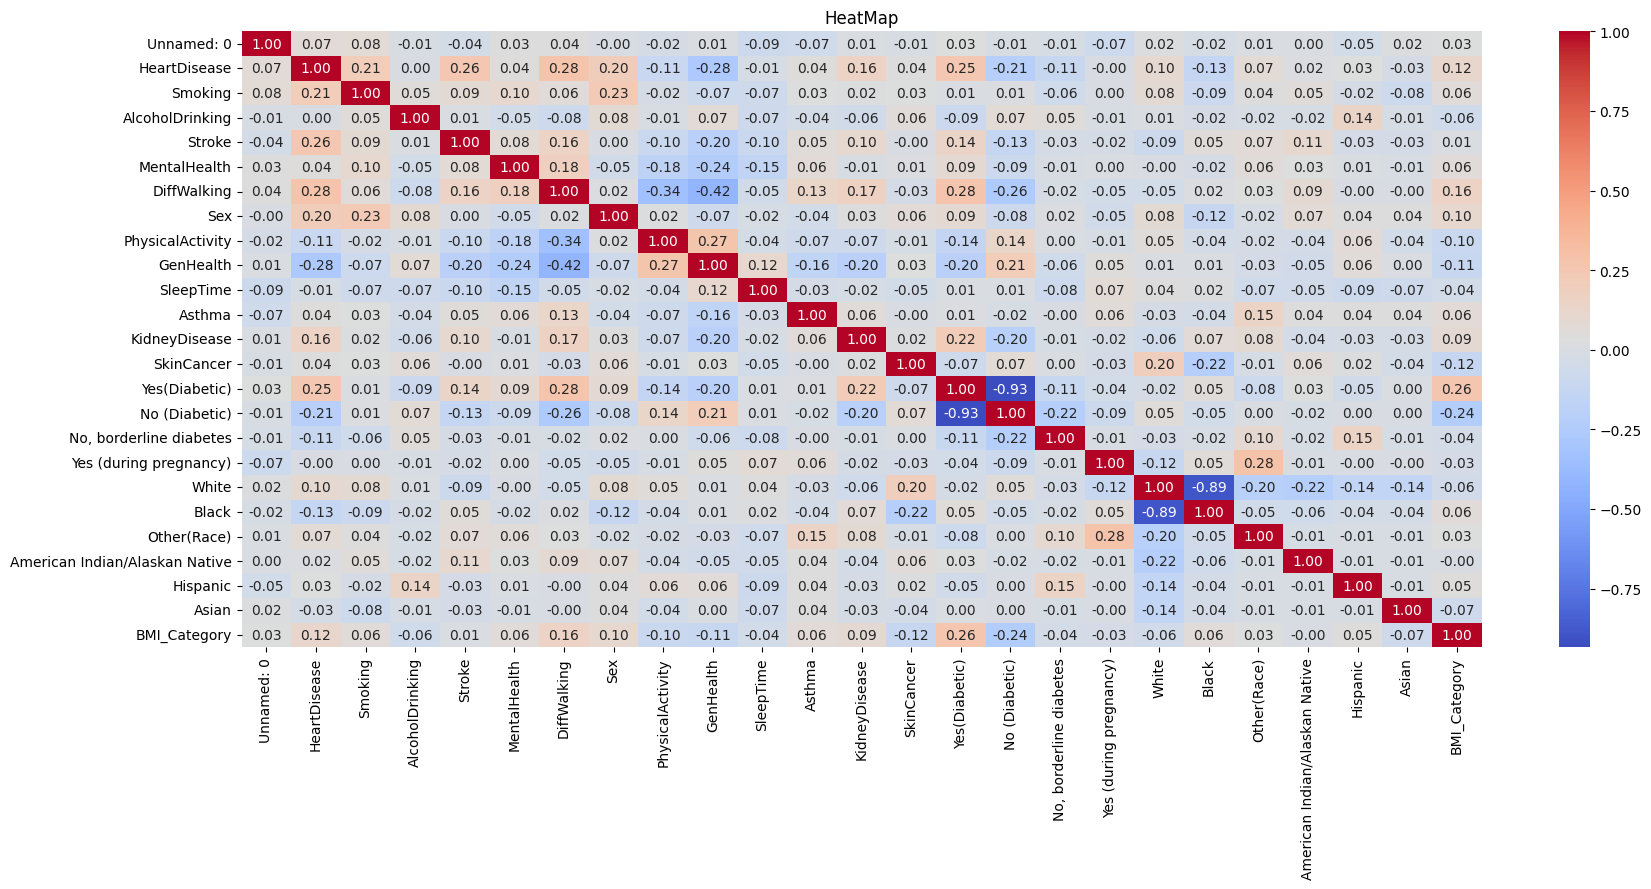

In [20]:
plt.figure(figsize=(20,8))
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm',fmt='.2f')
plt.title("HeatMap")
plt.show()

Here We are taking those features in our dataframe which have value less than .1 for Heartdisease. 
i.e. BMI_Category, smoking , stroke , GenHealth, DiffWaking, Sex, PhysicalActivity, GenHealth , KidneyDisease, Yes(Diabetic), No (Diabetic), No, borderline diabetes, White, Black, Other(Race)

In [21]:
columns_to_keep = ['HeartDisease', 'Smoking', 'Stroke',	'DiffWalking', 'Sex', 'PhysicalActivity', 'GenHealth', 'KidneyDisease','Yes(Diabetic)', 'No (Diabetic)', 'No, borderline diabetes', 'White', 'Black', 'Other(Race)', 'BMI_Category']	

# Drop columns except those in columns_to_keep
columns_to_drop = [col for col in df.columns if col not in columns_to_keep]
df.drop(columns=columns_to_drop, inplace=True)
df

,HeartDisease,Smoking,Stroke,DiffWalking,Sex,PhysicalActivity,GenHealth,KidneyDisease,Yes(Diabetic),No (Diabetic),"No, borderline diabetes",White,Black,Other(Race),BMI_Category
0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1
1,1,0,0,0,0,1,1,0,1,0,0,0,1,0,1
2,0,0,0,1,1,0,1,0,1,0,0,1,0,0,1
3,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0
4,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1
496,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0
497,1,1,1,0,1,1,1,0,0,1,0,1,0,0,1
498,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0


In [22]:
X = df.drop(columns=["HeartDisease"])

Y = df["HeartDisease"]

X_train = X[:400]
Y_train = Y[:400]

X_test = X[400:]
Y_test = Y[400:]

In [23]:
X_train 

,Smoking,Stroke,DiffWalking,Sex,PhysicalActivity,GenHealth,KidneyDisease,Yes(Diabetic),No (Diabetic),"No, borderline diabetes",White,Black,Other(Race),BMI_Category
0,1,0,1,0,1,1,0,1,0,0,1,0,0,1
1,0,0,0,0,1,1,0,1,0,0,0,1,0,1
2,0,0,1,1,0,1,0,1,0,0,1,0,0,1
3,0,0,0,0,1,1,0,0,1,0,1,0,0,0
4,0,1,0,0,1,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,0,0,1,0,1,0,1,0,0,1,0,0,1
396,0,0,0,0,0,1,0,0,0,1,0,1,0,0
397,0,0,0,1,1,0,0,0,1,0,1,0,0,0
398,0,0,0,0,0,1,0,1,0,0,1,0,0,1


In [24]:
X_train_array = X_train.values  
Y_train_array = Y_train.values 

In [25]:
def compute_entropy(y):
    
    entropy = 0.

    if len(y) != 0:
        p1 = len(y[y == 1]) / len(y) 

        if p1 != 0 and p1 != 1:
            entropy = -p1 * np.log2(p1) - (1 - p1) * np.log2(1 - p1)
        else:
            entropy = 0.

    return entropy

In [26]:
print("Entropy at root node: ", compute_entropy(Y_train)) 

Entropy at root node:  0.9985387778753936


In [27]:
def split_dataset(X, node_indices, feature):
    
    left_indices = []
    right_indices = []

    for i in node_indices:   
        if X[i][feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)

    return left_indices, right_indices
        

In [28]:

root_indices = ['BMI', 'Smoking', 'Stroke',	'PhysicalHealth', 'DiffWalking', 'Sex', 'Diabetic' ,'PhysicalActivity', 'GenHealth', 'KidneyDisease']


In [29]:
def compute_information_gain(X, y, node_indices, feature):

    left_indices, right_indices = split_dataset(X, node_indices, feature)

    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]

    information_gain = 0

    node_entropy = compute_entropy(y_node)
    left_entropy = compute_entropy(y_left)
    right_entropy = compute_entropy(y_right)

    w_left = len(X_left) / len(X_node)
    w_right = len(X_right) / len(X_node) 

    weighted_entropy = w_left * left_entropy + w_right * right_entropy

    information_gain = node_entropy - weighted_entropy

    return information_gain

In [30]:
X_train_array = X_train.values
Y_train_array = Y_train.values 
num_features = X_train_array.shape[1]
node_indices = list(range(len(X_train_array)))
for feature in range(num_features):
    info_gain = compute_information_gain(X_train_array, Y_train_array,node_indices, feature )
    print(info_gain)

0.03143489795917698
0.039452099199829505
0.04129558971066638
0.02766566060873954
0.004924438988488378
0.05483375860552786
0.02193000160955605
0.04437430742663184
0.030963855688539432
0.007788740728067345
0.009050723198840371
0.010931610719285167
0.0007920248334238877
0.002699946776026252


In [31]:
def get_best_split(X, y, node_indices):   

    num_features = X.shape[1]

    best_feature = -1

    max_info_gain = 0

    for feature in range(num_features): 

        info_gain =  compute_information_gain(X, y, node_indices, feature)

        if info_gain > max_info_gain:
            max_info_gain =  info_gain
            best_feature =  feature

    return best_feature

In [32]:
tree = []
def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth, feature_names):
    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return

    best_feature_index = get_best_split(X, y, node_indices)
    best_feature_name = feature_names[best_feature_index]

    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %s" % (formatting, current_depth, branch_name, best_feature_name))

    left_indices, right_indices = split_dataset(X, node_indices, best_feature_index)
    tree.append((left_indices, right_indices, best_feature_index))

    # Update the node indices for left and right branches
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth+1, feature_names)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth+1, feature_names)

# Call the build_tree_recursive function with the initial node indices (all samples)
X_train_array = X_train.values  # Convert DataFrame to numpy array
Y_train_array = Y_train.values  # Convert DataFrame to numpy array
build_tree_recursive(X_train_array, Y_train_array, list(range(len(X_train_array))), "Root", max_depth=2, current_depth=0, feature_names = root_indices)


 Depth 0, Root: Split on feature: Sex
- Depth 1, Left: Split on feature: BMI
  -- Left leaf node with indices [0, 5, 6, 8, 11, 13, 18, 23, 27, 28, 29, 34, 43, 47, 49, 53, 55, 58, 61, 67, 71, 73, 76, 77, 84, 88, 89, 93, 97, 99, 100, 103, 106, 107, 116, 117, 119, 124, 126, 134, 137, 142, 143, 147, 148, 154, 159, 167, 177, 178, 181, 184, 185, 195, 196, 198, 200, 213, 214, 216, 217, 221, 228, 229, 242, 245, 256, 257, 260, 265, 269, 273, 278, 280, 285, 288, 289, 290, 292, 294, 297, 304, 308, 312, 317, 318, 320, 321, 323, 325, 327, 329, 330, 332, 341, 342, 345, 347, 349, 359, 364, 365, 366, 367, 368, 370, 379, 380, 384, 387, 389, 390, 392, 395]
  -- Right leaf node with indices [1, 2, 3, 4, 7, 9, 12, 17, 19, 22, 24, 26, 30, 31, 32, 35, 38, 39, 40, 41, 45, 48, 50, 51, 52, 56, 57, 59, 64, 65, 68, 70, 75, 78, 81, 82, 85, 86, 92, 94, 95, 96, 104, 105, 108, 110, 111, 115, 118, 123, 127, 133, 140, 146, 149, 151, 155, 156, 160, 164, 165, 169, 170, 174, 175, 180, 182, 186, 187, 188, 189, 190, 191, 1

Accuracy 0.71


c:\Python 3.10\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


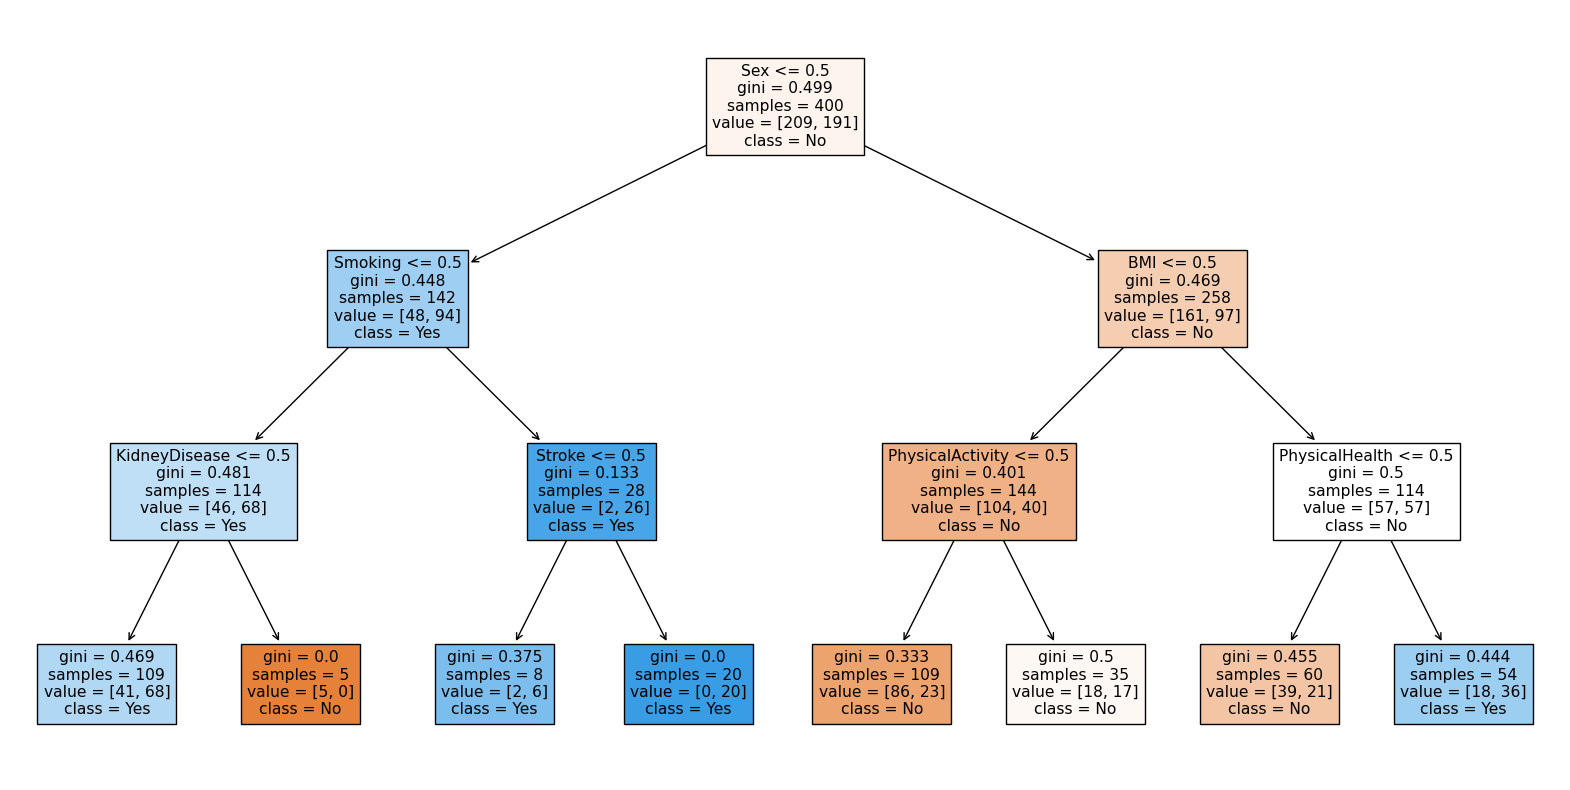

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# Define your parameters
X_train_array = X_train.values  # Convert DataFrame to numpy array
Y_train_array = Y_train.values  # Convert DataFrame to numpy array
root_indices = ['BMI', 'Smoking', 'Stroke', 'PhysicalHealth', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'KidneyDisease']
max_depth = 3  # Set the maximum depth of your decision tree

# Train your decision tree classifier
clf = DecisionTreeClassifier(max_depth=max_depth)
clf.fit(X_train_array, Y_train_array)
predict1 = clf.predict(X_test)
zuki = accuracy_score(predict1,Y_test)
print('Accuracy', zuki)

# Visualize the decision tree
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(clf, filled=True, feature_names=root_indices, class_names=["No", "Yes"])  # Modify class_names as needed
plt.show()
